# Country of export and import by month and year

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import csv
import seaborn as sns

### Which countries import everything by month?

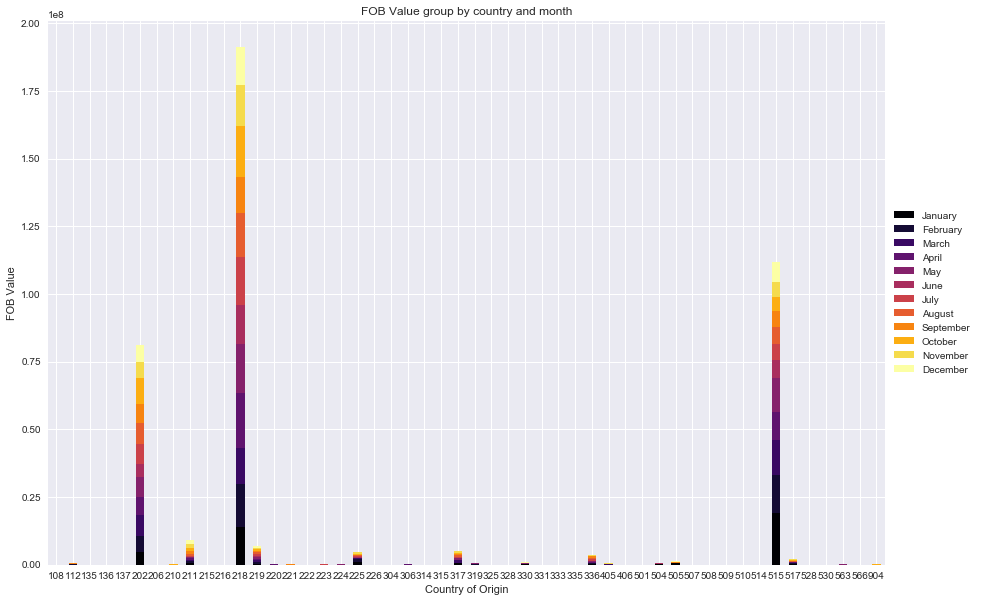

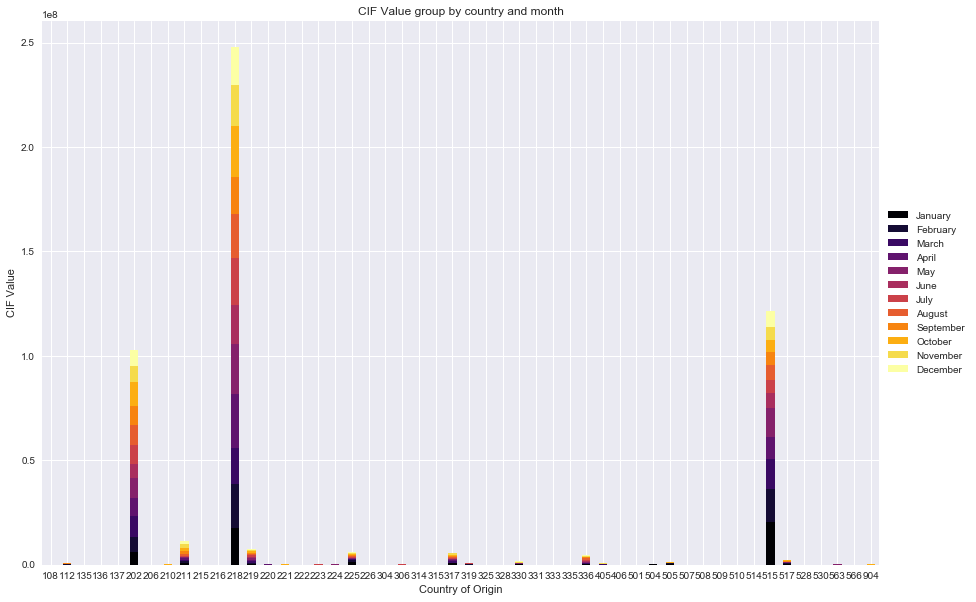

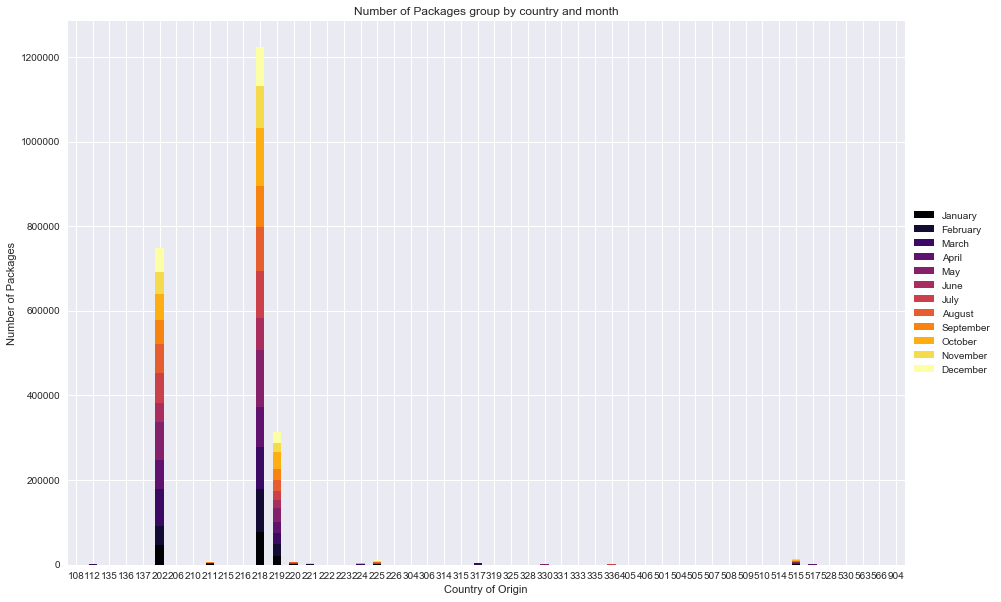

In [33]:
filename = "data" + os.sep + "import" + os.sep + "all_import_with_group.txt"
usecols =  ["MONTH", "FOB", "CIF", "CANT_BUL1", "PA_ORIG"]

data = pd.read_csv(filename, decimal=',',
                   sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                   usecols = usecols)
 
colors = plt.cm.inferno(np.linspace(0, 1, 12))

for element,text in [("FOB",  "FOB Value"),
                     ("CIF", "CIF Value"),
                     ("CANT_BUL1", "Number of Packages")]:
        
    new_data_grouper = data[["PA_ORIG", "MONTH", element]].groupby(['PA_ORIG', 'MONTH']).sum()

    plot = new_data_grouper.unstack().plot(kind='bar',stacked=True,figsize=(15, 10), color=colors)

    plot.set_title(text + " group by country and month")
    plot.set_xlabel("Country of Origin")
    plot.set_ylabel(text)
    
    plot.legend(["January","February","March","April", "May", "June", "July",
                 "August", "September", "October", "November", "December"],
                loc='center left', bbox_to_anchor=(1.0, 0.5))
    
    plot.set_xticklabels(plot.get_xticklabels(), rotation="horizontal")
    
    plt.subplots_adjust(hspace=0.3)
    
    plt.show()
    # print(new_data_grouper.unstack())

### To which countries we export everything by month?

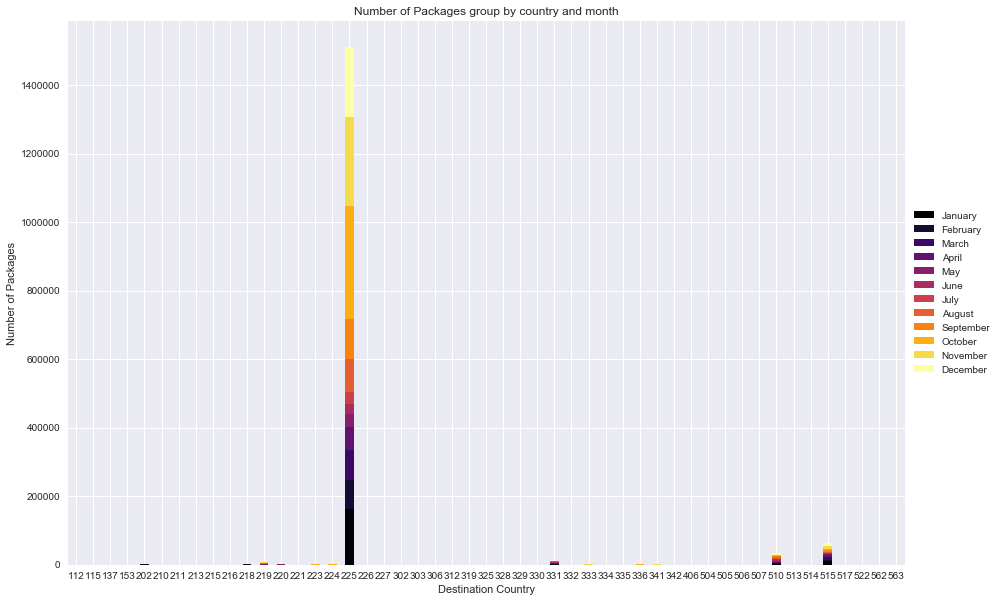

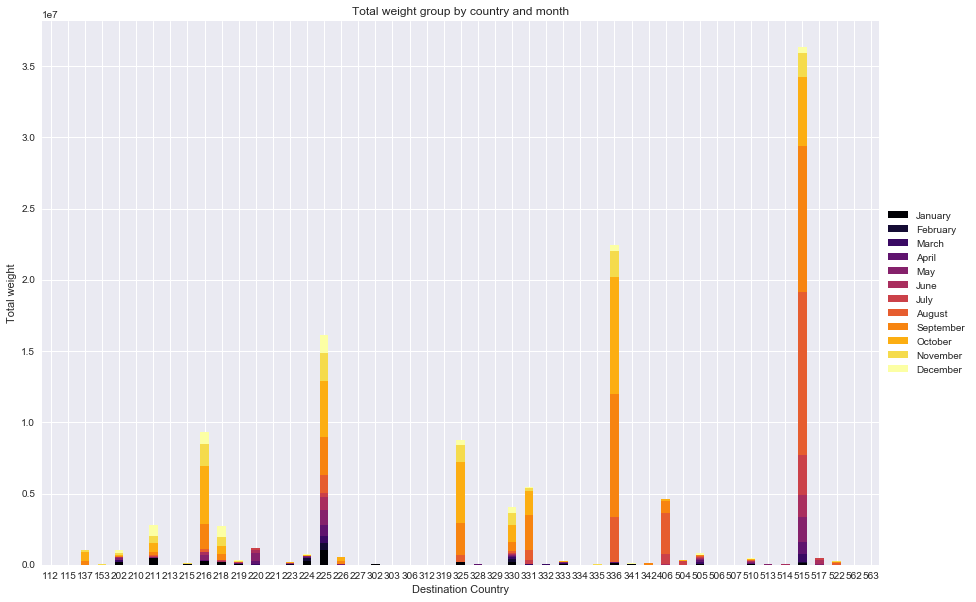

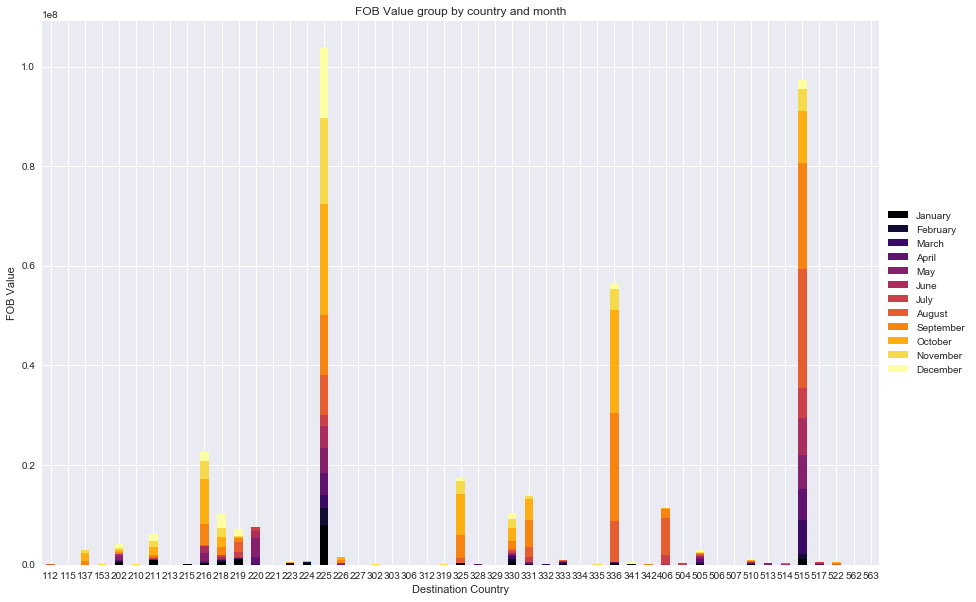

In [34]:
filename = "data" + os.sep + "export" + os.sep + "all_export_with_group.txt"
usecols =  ["PAISDESTINO", "MONTH", "TOTALBULTOS", "PESOBRUTOTOTAL", "TOTALVALORFOB"]

data = pd.read_csv(filename, decimal=',',
                   sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                   usecols = usecols)
 
colors = plt.cm.inferno(np.linspace(0, 1, 12))

for element,text in [("TOTALBULTOS",  "Number of Packages"),
                     ("PESOBRUTOTOTAL", "Total weight"),
                     ("TOTALVALORFOB", "FOB Value")]:
        
    new_data = data[["PAISDESTINO", "MONTH", element]]
    new_data_grouper = new_data.groupby(['PAISDESTINO', 'MONTH']).sum()

    plot = new_data_grouper.unstack().plot(kind='bar',stacked=True,figsize=(15, 10), color=colors)

    plot.set_title(text + " group by country and month")
    plot.set_xlabel("Destination Country")
    
    plot.set_ylabel(text)
    
    plot.legend(["January","February","March","April", "May", "June", "July",
                 "August", "September", "October", "November", "December"],
                loc='center left', bbox_to_anchor=(1.0, 0.5))

    plot.set_xticklabels(plot.get_xticklabels(), rotation="horizontal")

    plt.show()
    # print(new_data_grouper.unstack())

### Which countries import and export  everything by year?

-------------------------------------------------- FOB Value --------------------------------------------------


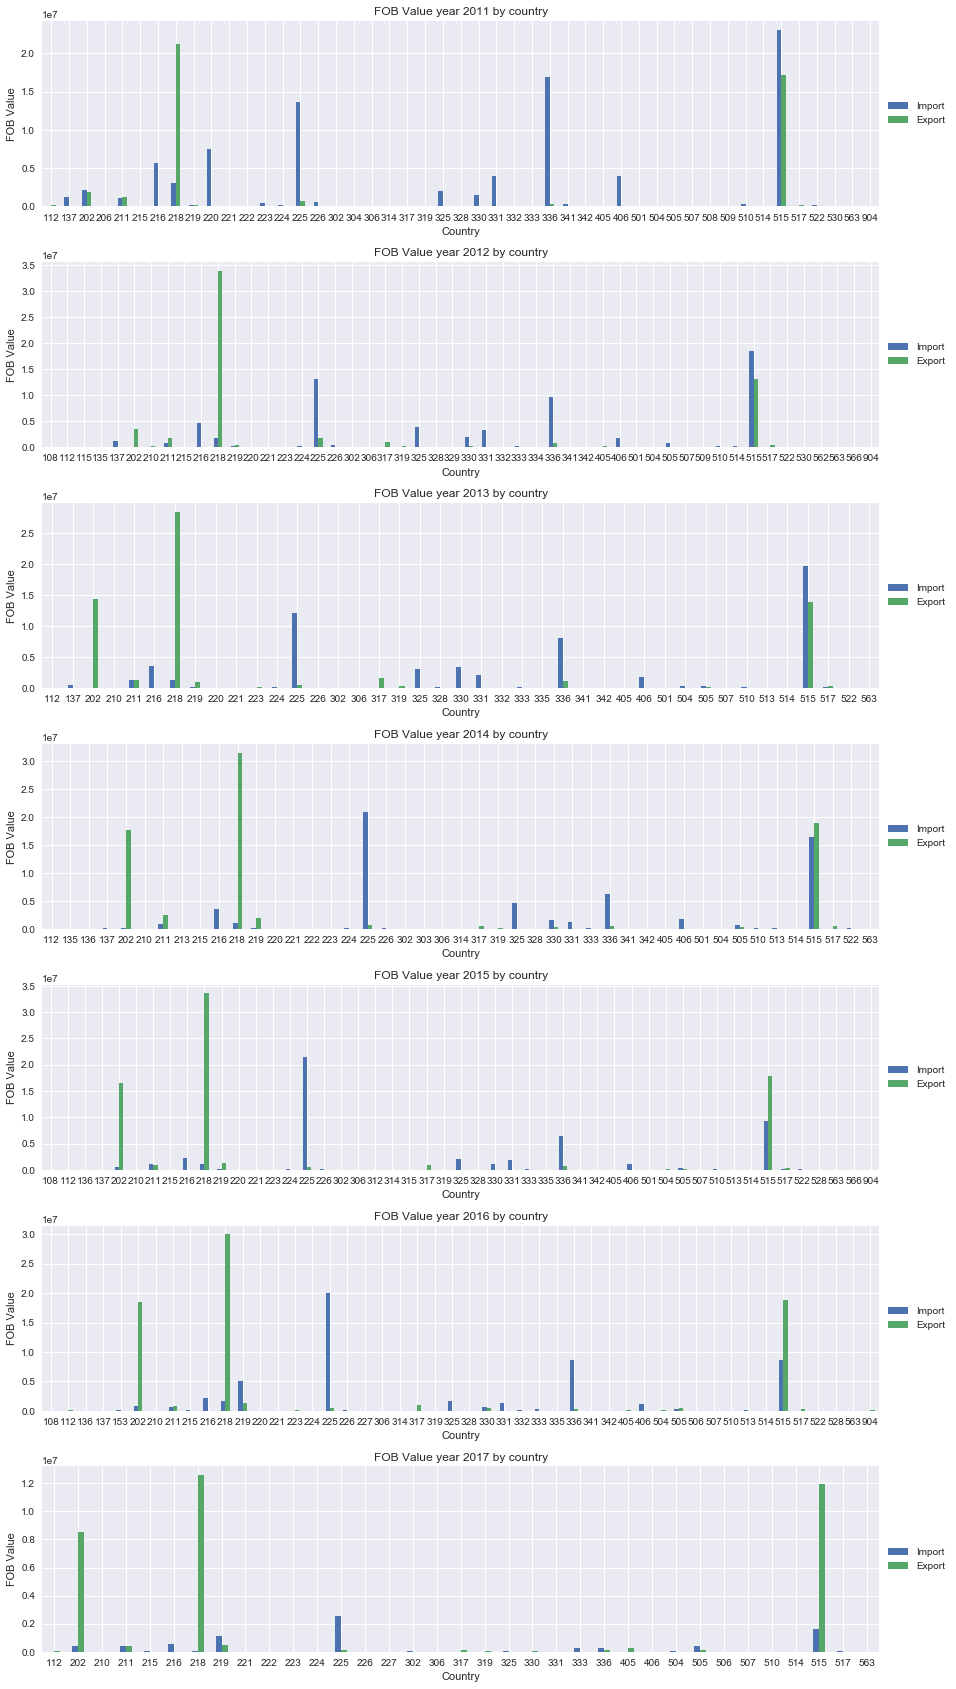

-------------------------------------------------- CIF Value --------------------------------------------------


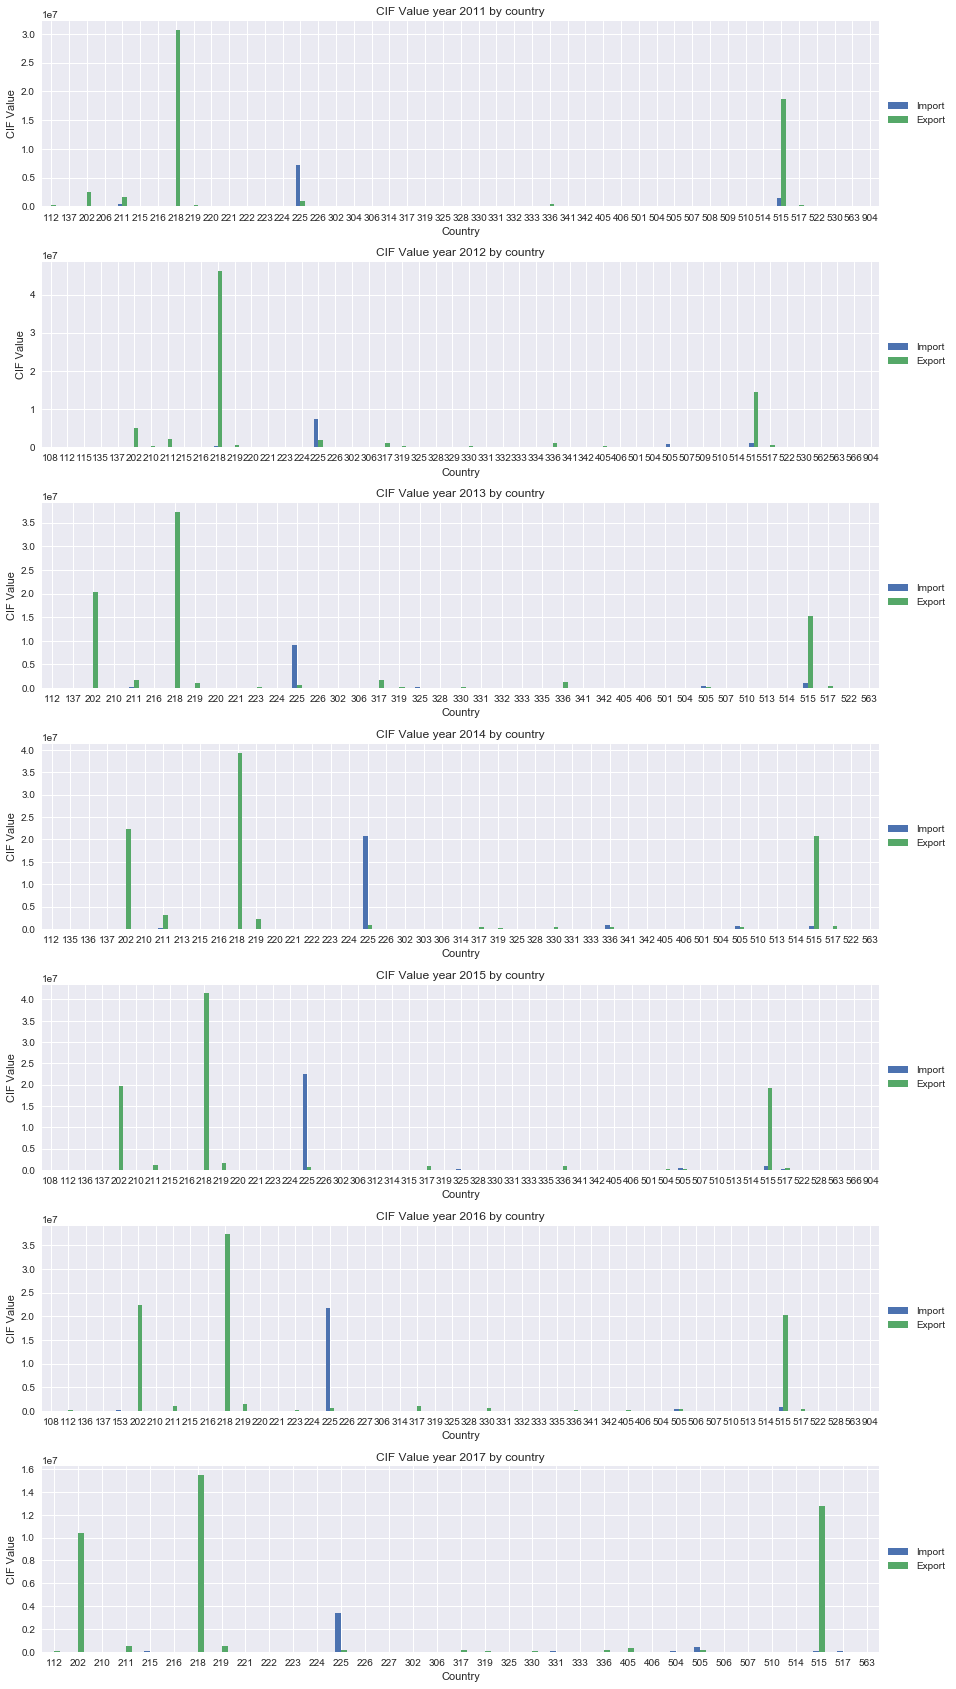

-------------------------------------------------- Number of Packages --------------------------------------------------


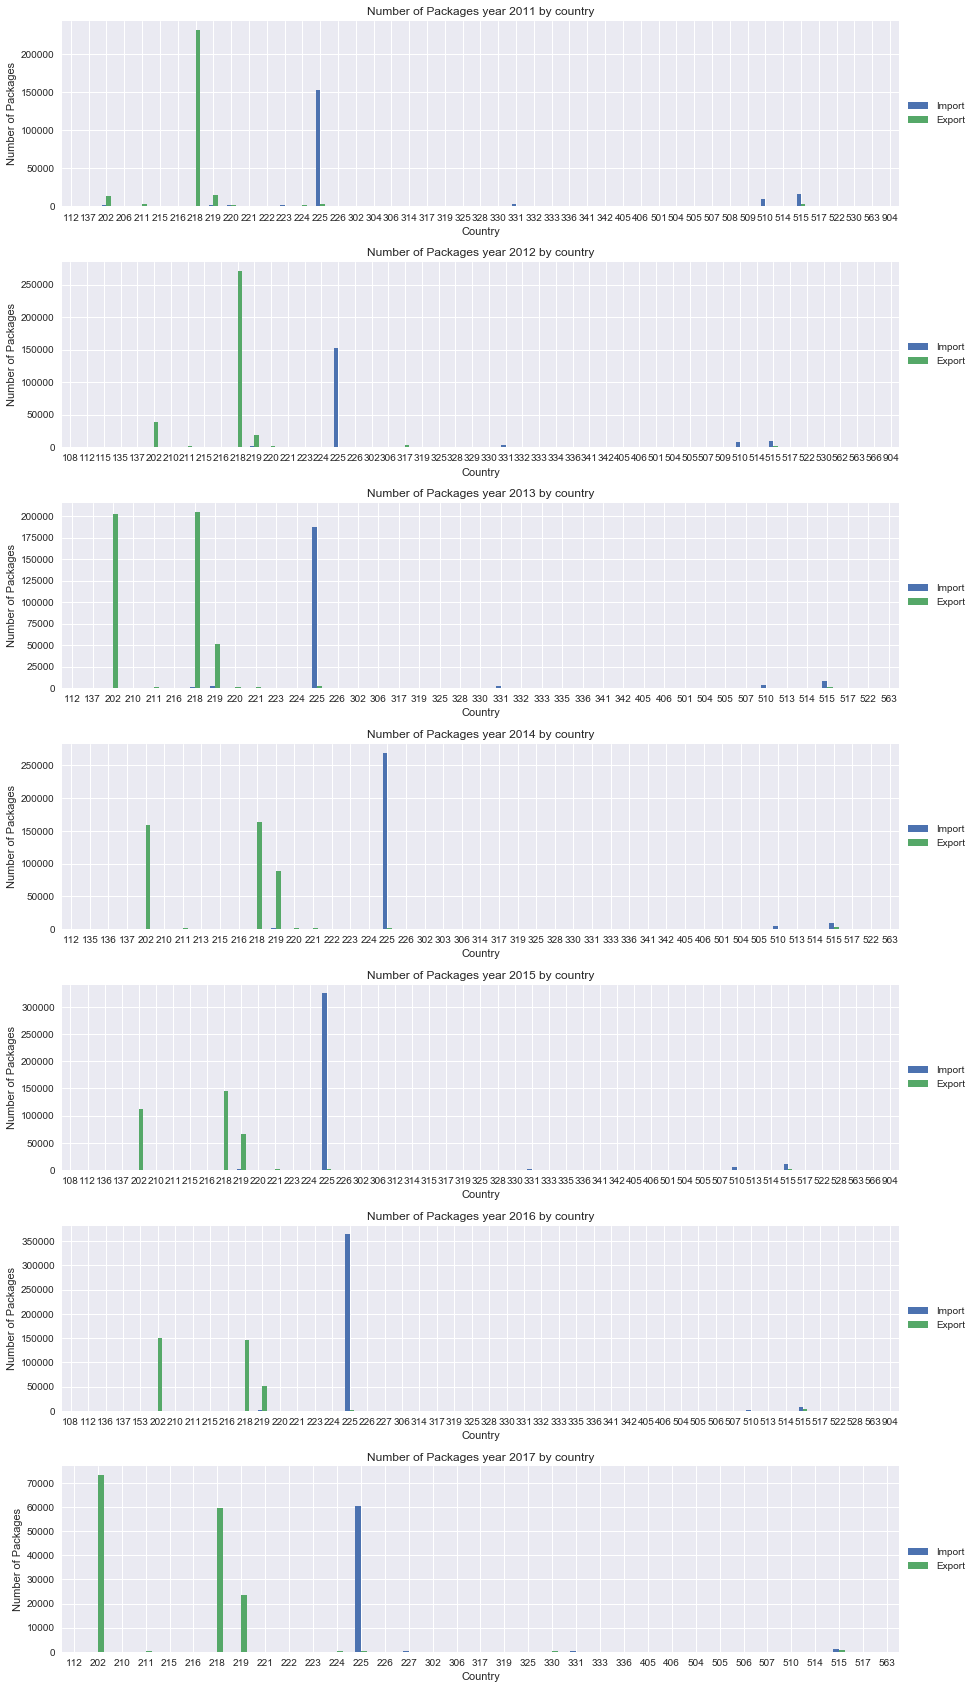

-------------------------------------------------- Total weight --------------------------------------------------


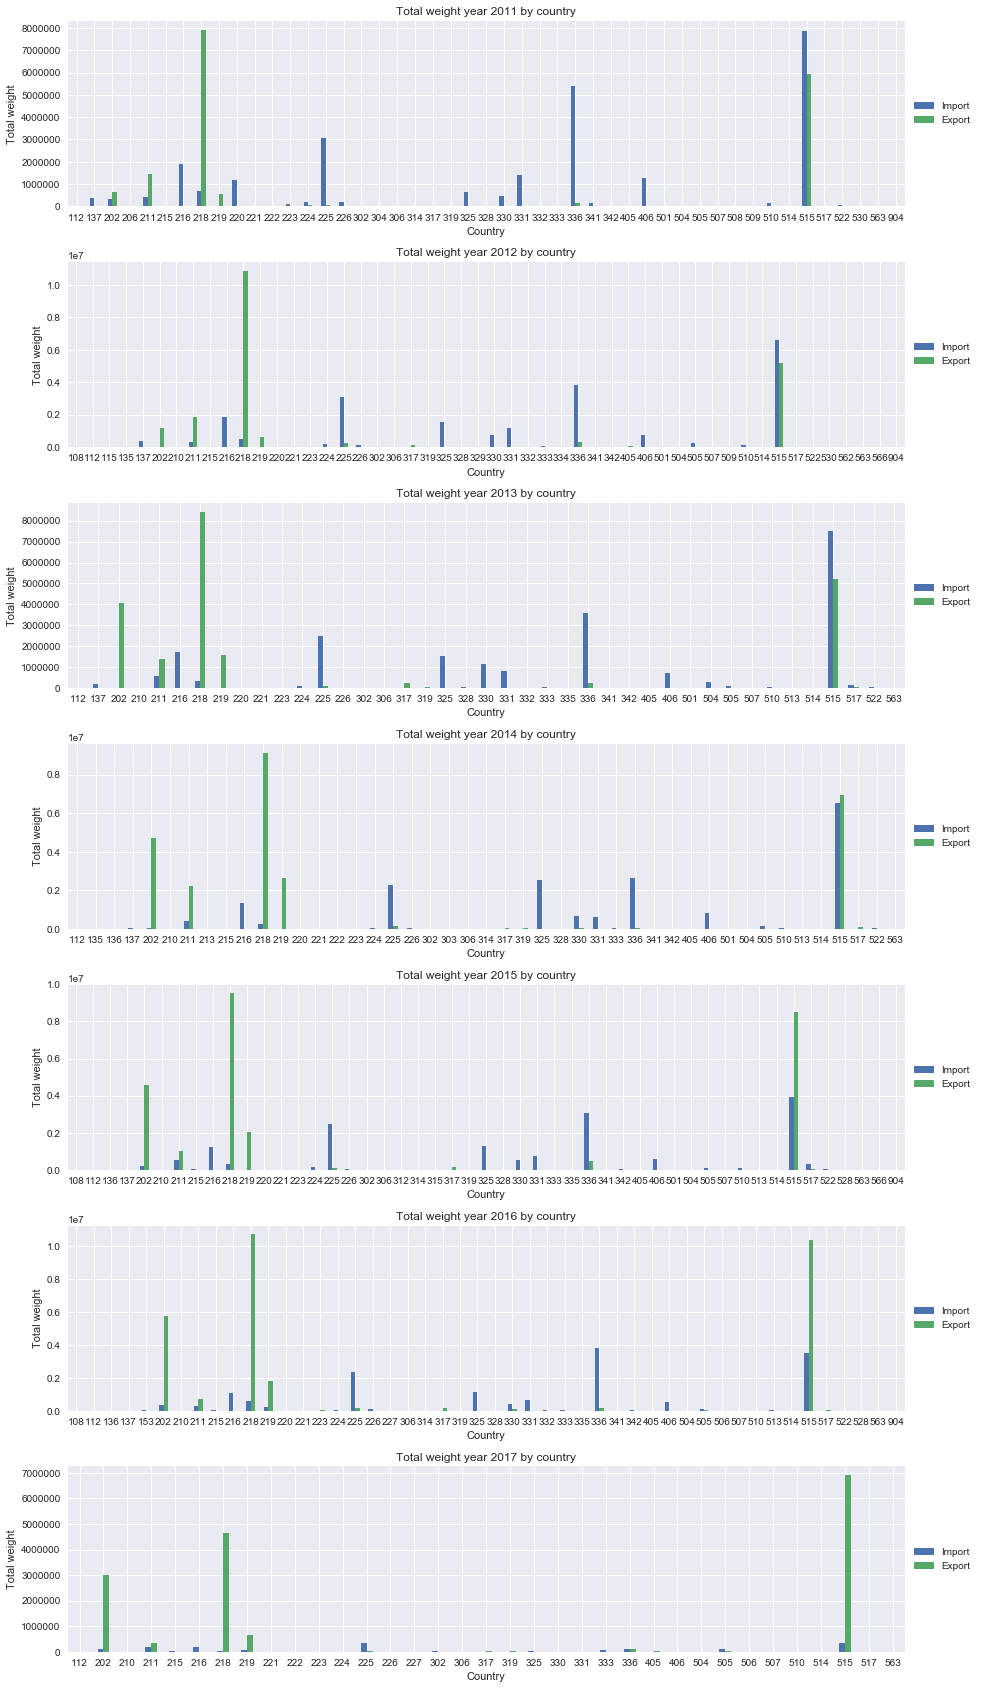

In [26]:
filename_export = "data" + os.sep + "export" + os.sep + "all_export_with_group.txt"
filename_import = "data" + os.sep + "import" + os.sep + "all_import_with_group.txt"

usecols_export =  ["YEAR", "TOTALBULTOS", "PESOBRUTOTOTAL", "TOTALVALORFOB", "VALORCIF", "PAISDESTINO"]
usecols_import =  ["YEAR", "FOB", "CIF", "CANT_BUL1", "TOT_PESO", "PA_ORIG"]

data_import = pd.read_csv(filename_import, decimal=',',
                   sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                   usecols = usecols_import)

data_export = pd.read_csv(filename_export, decimal=',',
                          sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                          usecols = usecols_export)
# concatenate data

data_import["TYPE"] = "Import"
data_export["TYPE"] = "Export"

data_export.columns = ['PAIS', 'BULTOS', 'PESO', 'FOB', 'CIF', 'YEAR', 'TYPE']

data_import.columns = ['PAIS', 'FOB', 'PESO', 'CIF', 'BULTOS', 'YEAR', 'TYPE']

final_data = pd.concat([data_import, data_export])
    
for element, text in [("FOB",  "FOB Value"),
                     ("CIF", "CIF Value"),
                     ("BULTOS", "Number of Packages"),
                     ("PESO", "Total weight")]:
    
    fig, axes_month_share_y = plt.subplots(7)
    plt.subplots_adjust(hspace=0.3)
    
    i = 0
    
    tables = []
    
    print("{} {} {}".format("-"*50, text, "-"*50) )
    
    for year in range(2011, 2018):

        new_data = final_data[final_data["YEAR"] == year]
        
        new_data_grouper = new_data[["TYPE", element, "PAIS"]].groupby(['PAIS','TYPE']).sum()

        plot = new_data_grouper.unstack().plot(kind='bar',
                                               ax=axes_month_share_y[i],
                                               figsize=(15, 30))

        plot.set_title("{} year {} by country".format(text, year))
        plot.set_xlabel("Country")
        plot.set_ylabel(text)
        

        plot.legend(["Import", "Export"],
                     loc='center left', bbox_to_anchor=(1.0, 0.5))
        
        plot.set_xticklabels(plot.get_xticklabels(), rotation="horizontal")
        
        i += 1
        
        tables.append(new_data_grouper.unstack())
        
    plt.show()
    
    #for table, group in zip(tables, ["2011","2012","2013","2014", "2015", "2016", "2017"]):
    #    print("----- {} del año {} ------\n\n{}\n".format(text, group, table))

### Which countries import A, B, C, D and E by month and year?

-------------------------------------------------- FOB Value --------------------------------------------------


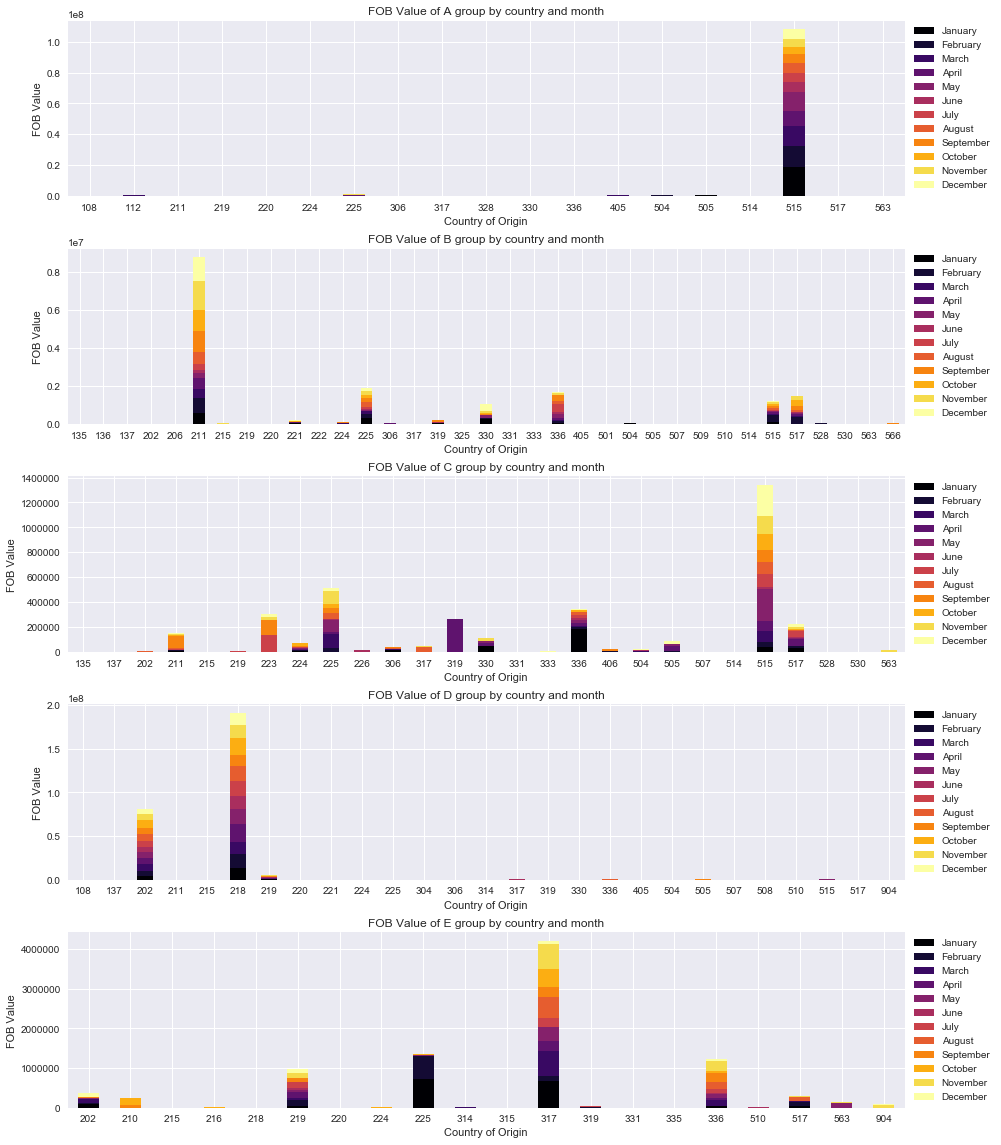

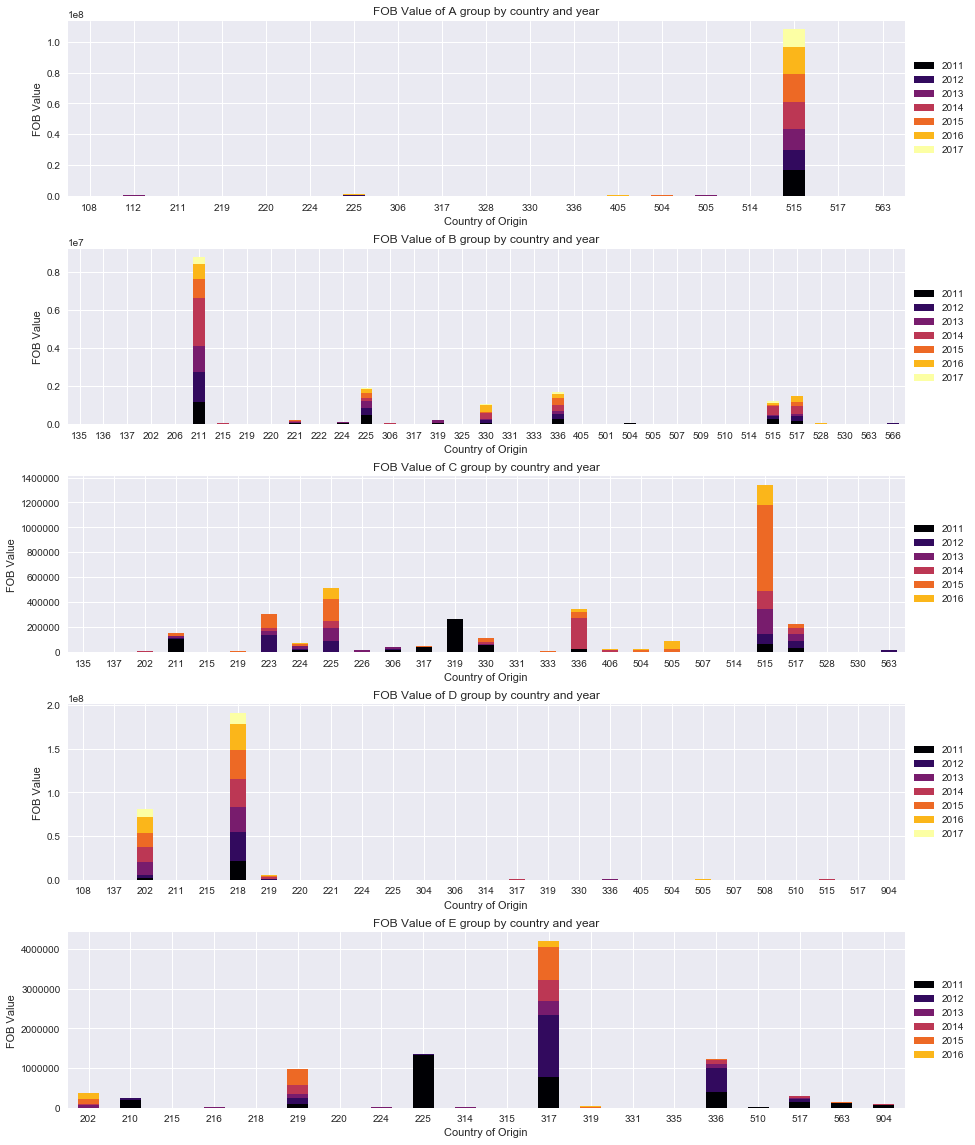

-------------------------------------------------- CIF Value --------------------------------------------------


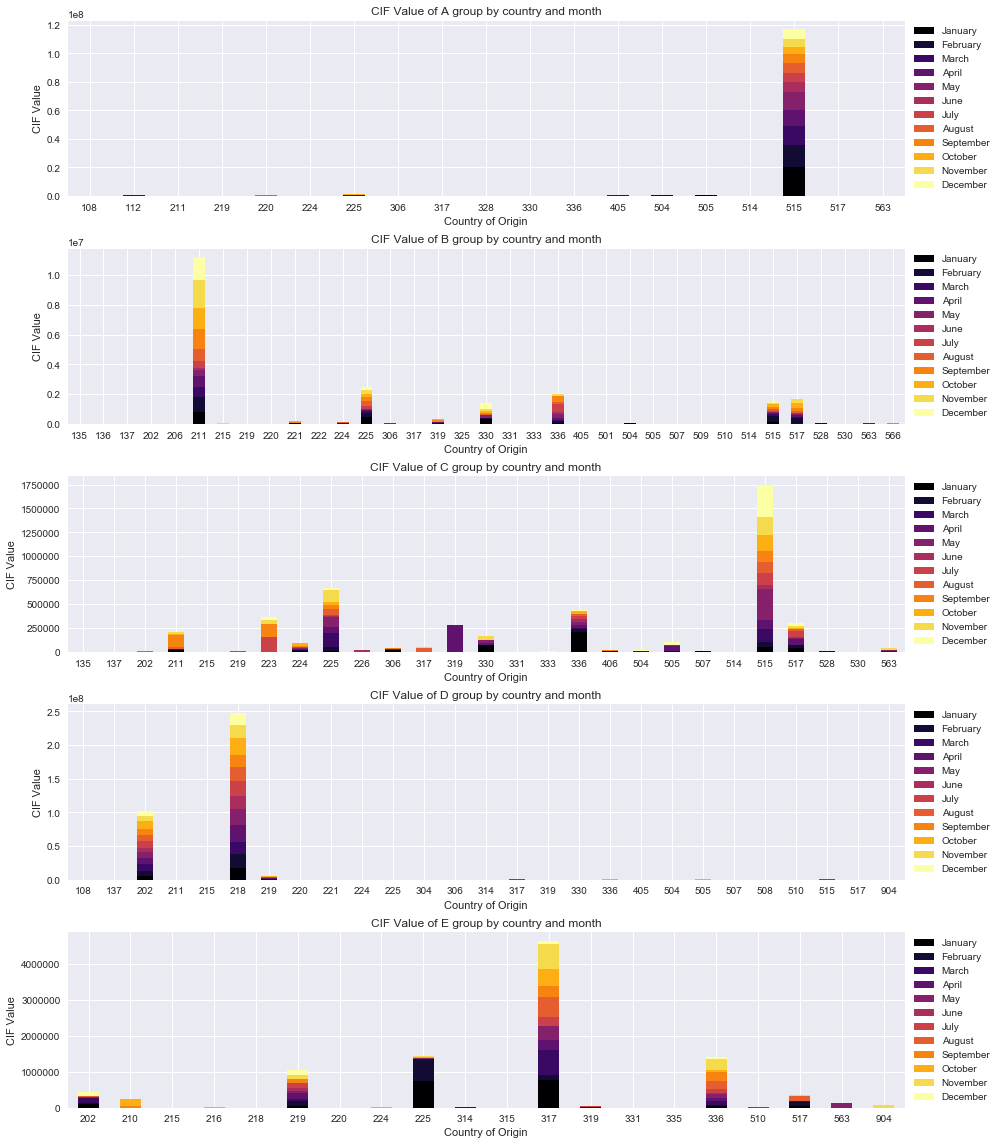

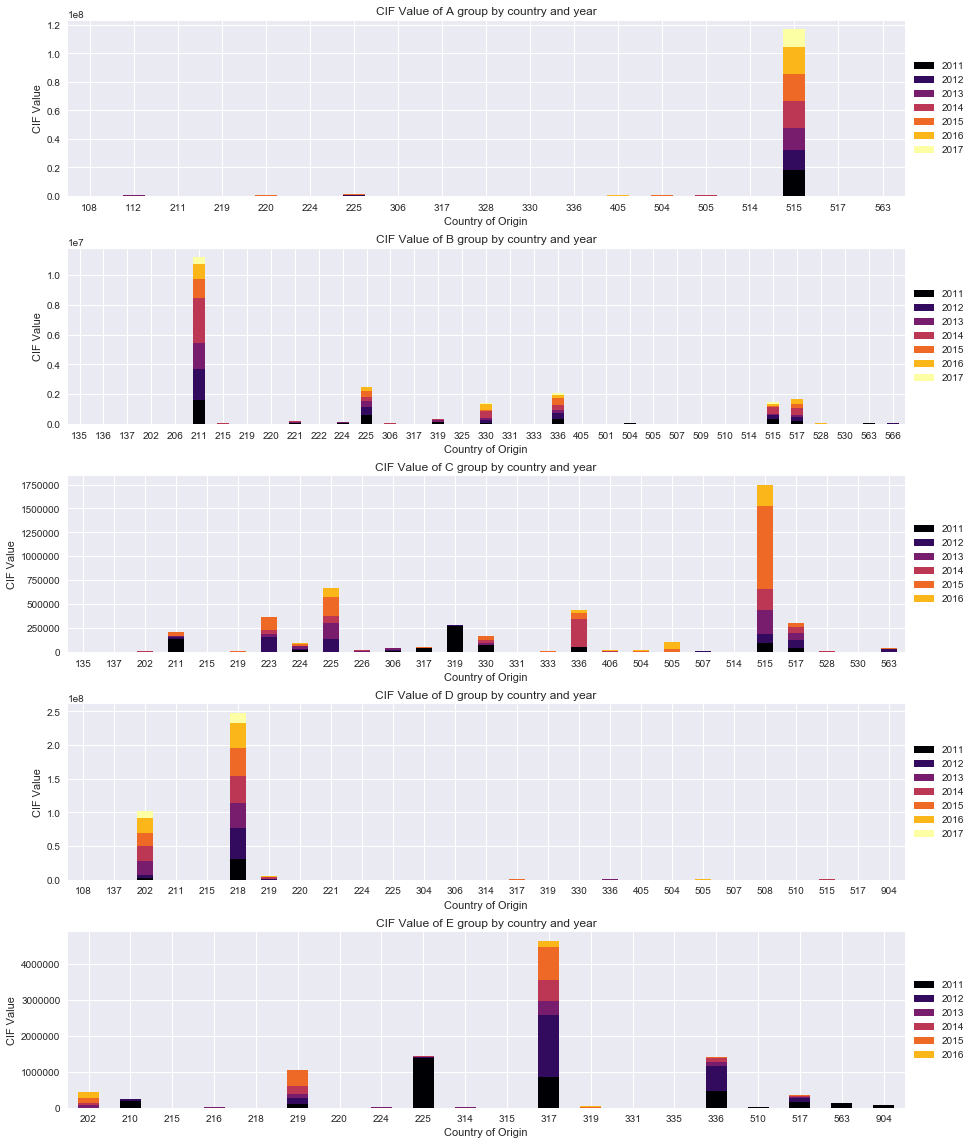

-------------------------------------------------- Number of Packages --------------------------------------------------


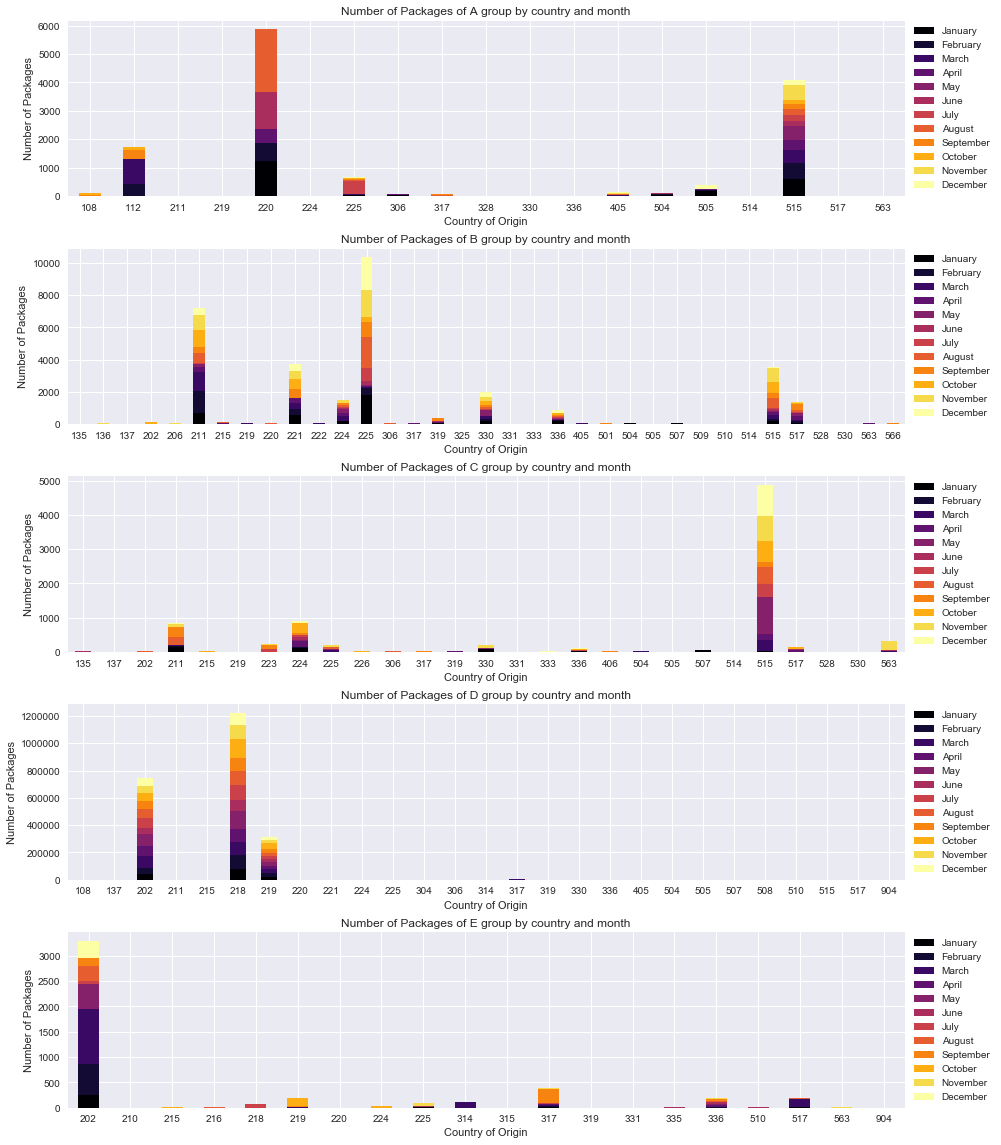

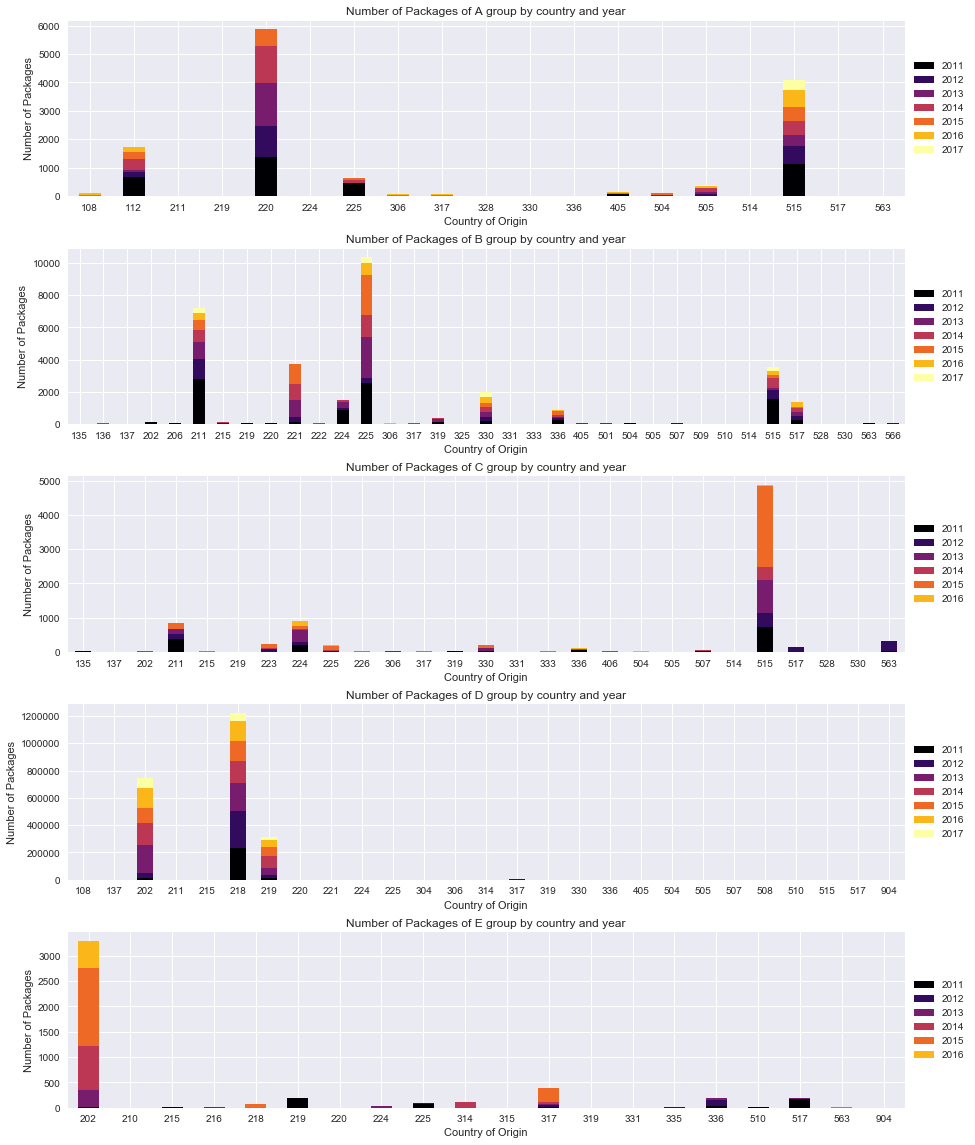

In [30]:
filename = "data" + os.sep + "import" + os.sep + "all_import_with_group.txt"
usecols =  ["MONTH", "FOB", "CIF", "CANT_BUL1", "GROUP", "PA_ORIG", "YEAR"]

data = pd.read_csv(filename, decimal=',',
                   sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                   usecols = usecols)
 
colors_month = plt.cm.inferno(np.linspace(0, 1, 12))
colors_year = plt.cm.inferno(np.linspace(0, 1, 7))

for element,text in [("FOB",  "FOB Value"),
                     ("CIF", "CIF Value"),
                     ("CANT_BUL1", "Number of Packages")]:
    
    print("{} {} {}".format("-"*50, text, "-"*50) )
    
    fig, axes_month = plt.subplots(5)
    plt.subplots_adjust(hspace=0.3)
    
    fig, axes_year = plt.subplots(5)
    plt.subplots_adjust(hspace=0.3)
    
    i = 0
    
    tables = []
    
    for group in ["A", "B", "C", "D", "E"]:
        
        new_data = data[data["GROUP"] == group]
        
        new_data_grouper = new_data[["MONTH", element, "PA_ORIG"]].groupby(["PA_ORIG", 'MONTH']).sum()
        
        plot = new_data_grouper.unstack().plot(kind='bar',
                                               ax=axes_month[i],
                                               stacked=True,
                                               figsize=(15, 20),
                                               color=colors_month)
        
        plot.set_title("{} of {} group by country and month".format(text, group))
        plot.set_xlabel("Country of Origin")
        plot.set_ylabel(text)
        
        plot.legend(["January","February","March","April", "May", "June", "July",
                     "August", "September", "October", "November", "December"], 
                    loc='center left', bbox_to_anchor=(1.0, 0.5))
        
        plot.set_xticklabels(plot.get_xticklabels(), rotation="horizontal")
                
        new_data_grouper = new_data[["YEAR", element, "PA_ORIG"]].groupby(["PA_ORIG", 'YEAR']).sum()
        
        plot = new_data_grouper.unstack().plot(kind='bar',
                                               ax=axes_year[i],
                                               stacked=True,
                                               figsize=(15, 20),
                                               color=colors_year)

        plot.set_title("{} of {} group by country and year".format(text, group))
        plot.set_xlabel("Country of Origin")
        plot.set_ylabel(text)
        
        plot.legend(["2011", "2012", "2013", "2014", "2015", "2016", "2017"],
                    loc='center left', bbox_to_anchor=(1.0, 0.5))
        
        plot.set_xticklabels(plot.get_xticklabels(), rotation="horizontal")

        
        i += 1
        
        tables.append(new_data_grouper.unstack().to_string())
        
    plt.show()
    
    #for table, group in zip(tables, ["A", "B", "C", "D", "E"]):
    #    print("----- {} del grupo {} ------\n\n{}\n".format(text, group, table))

### To which countries we export A, B, C, D and E by month and year?

-------------------------------------------------- Number of Packages --------------------------------------------------


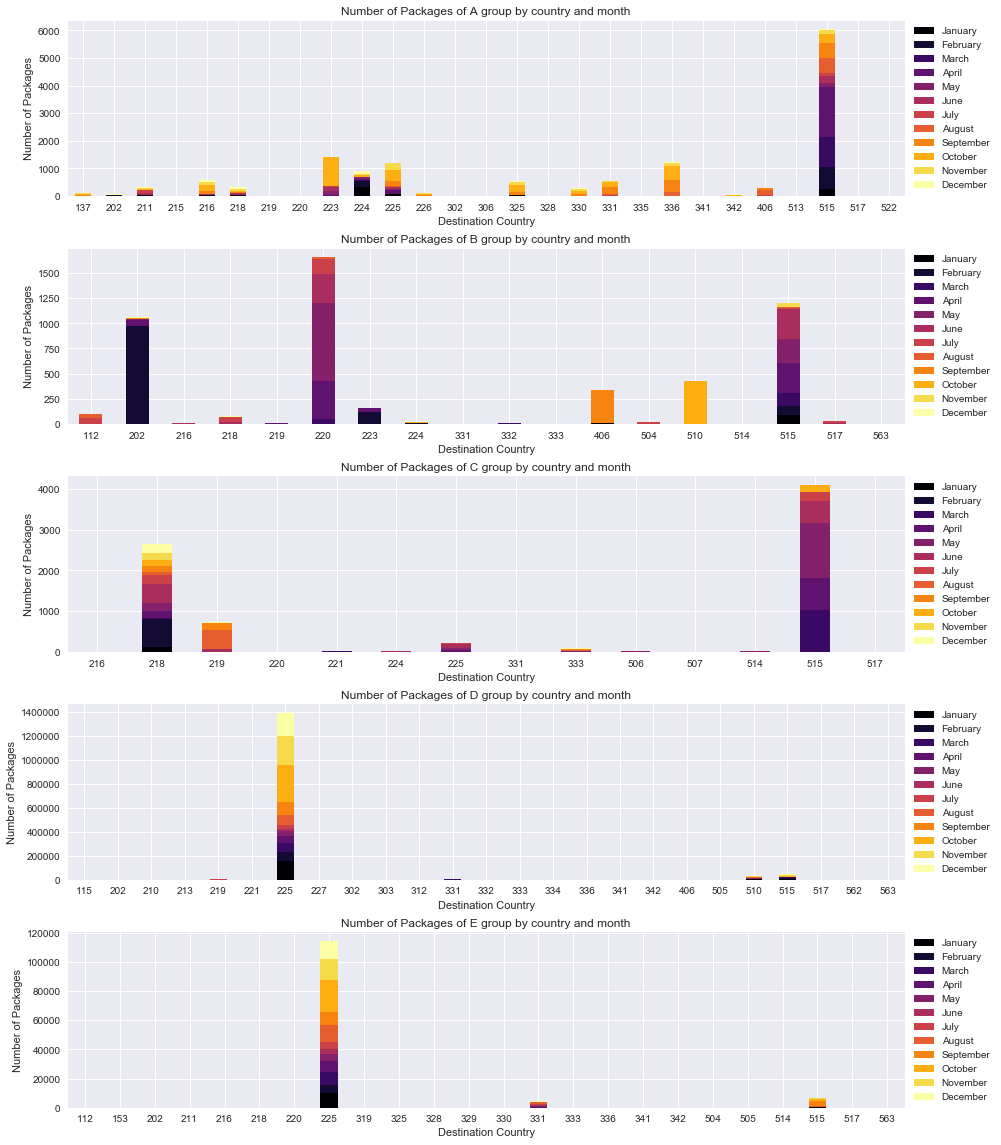

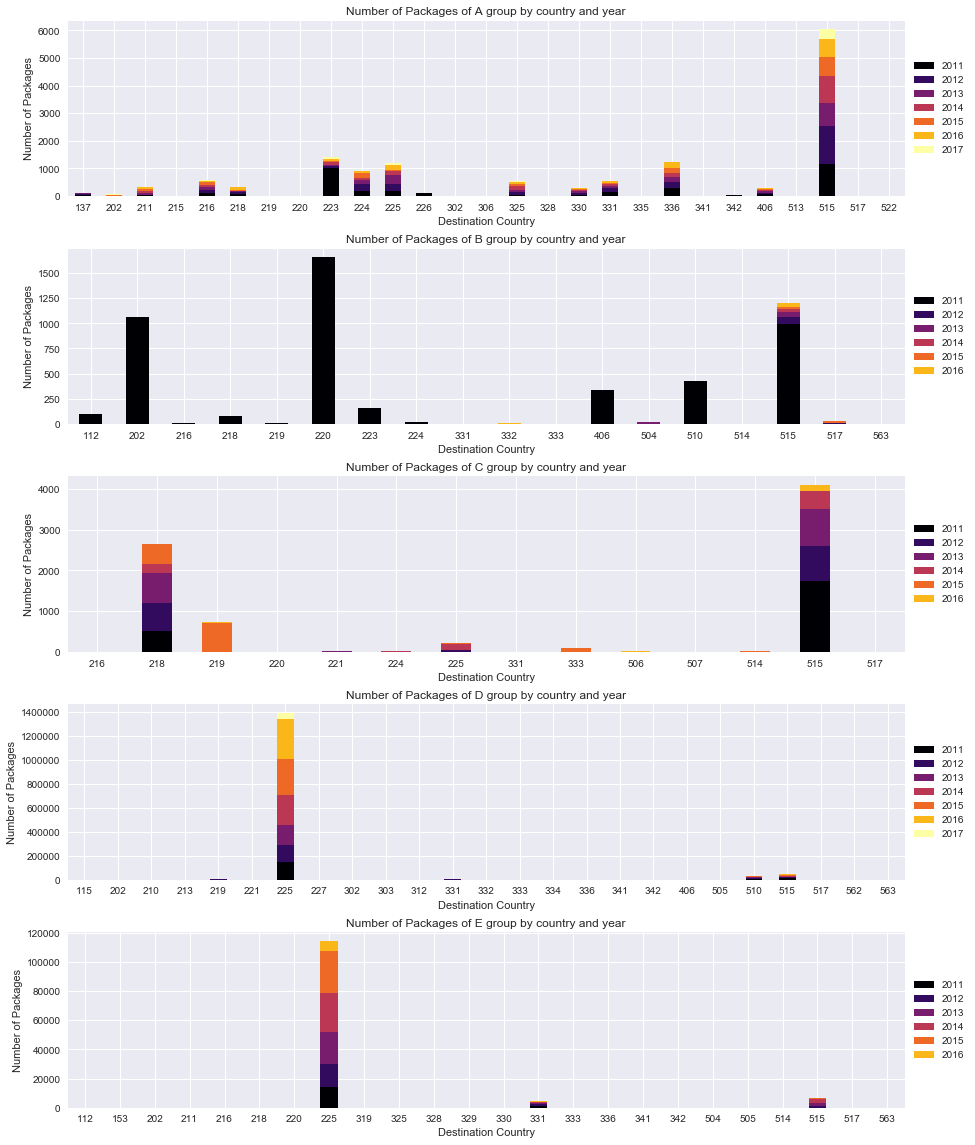

-------------------------------------------------- Total weight --------------------------------------------------


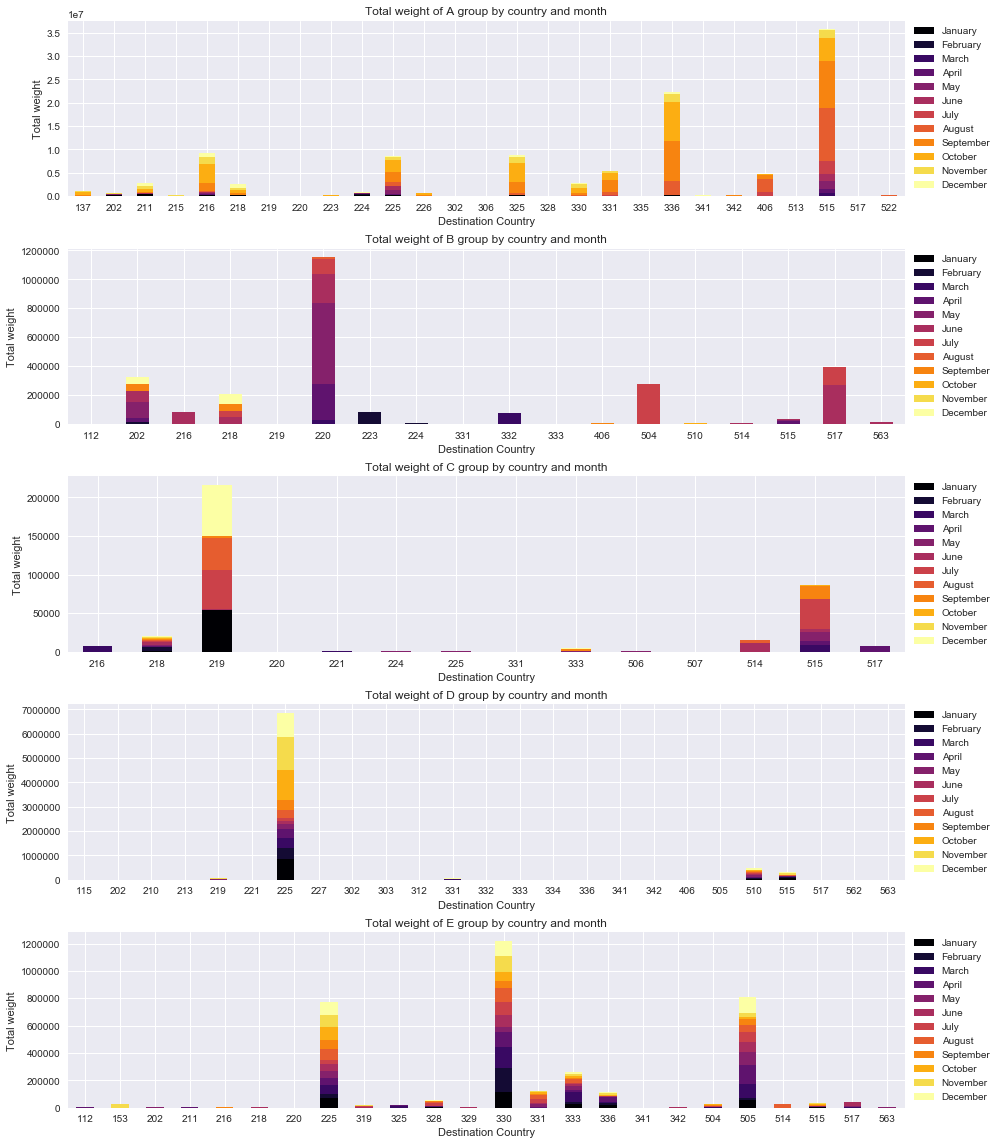

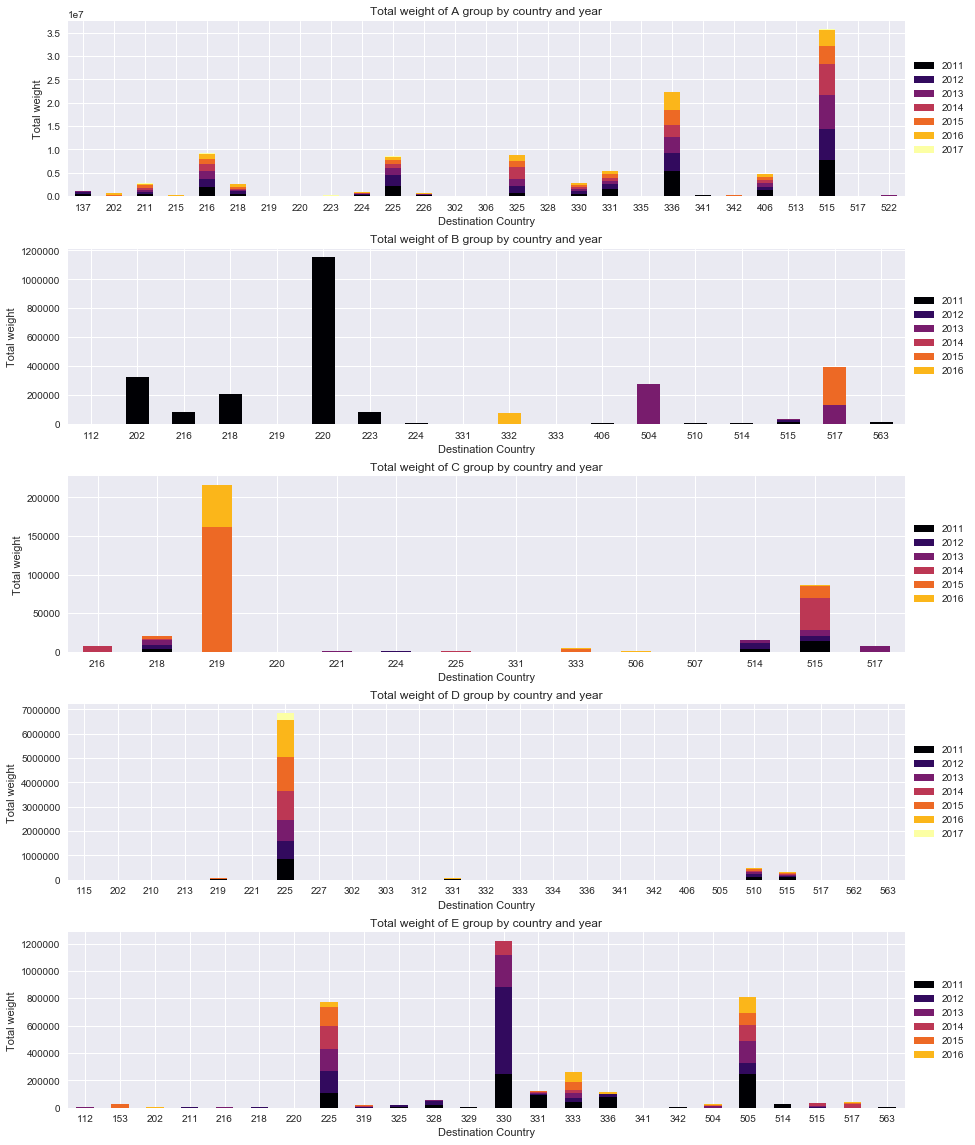

-------------------------------------------------- FOB Value --------------------------------------------------


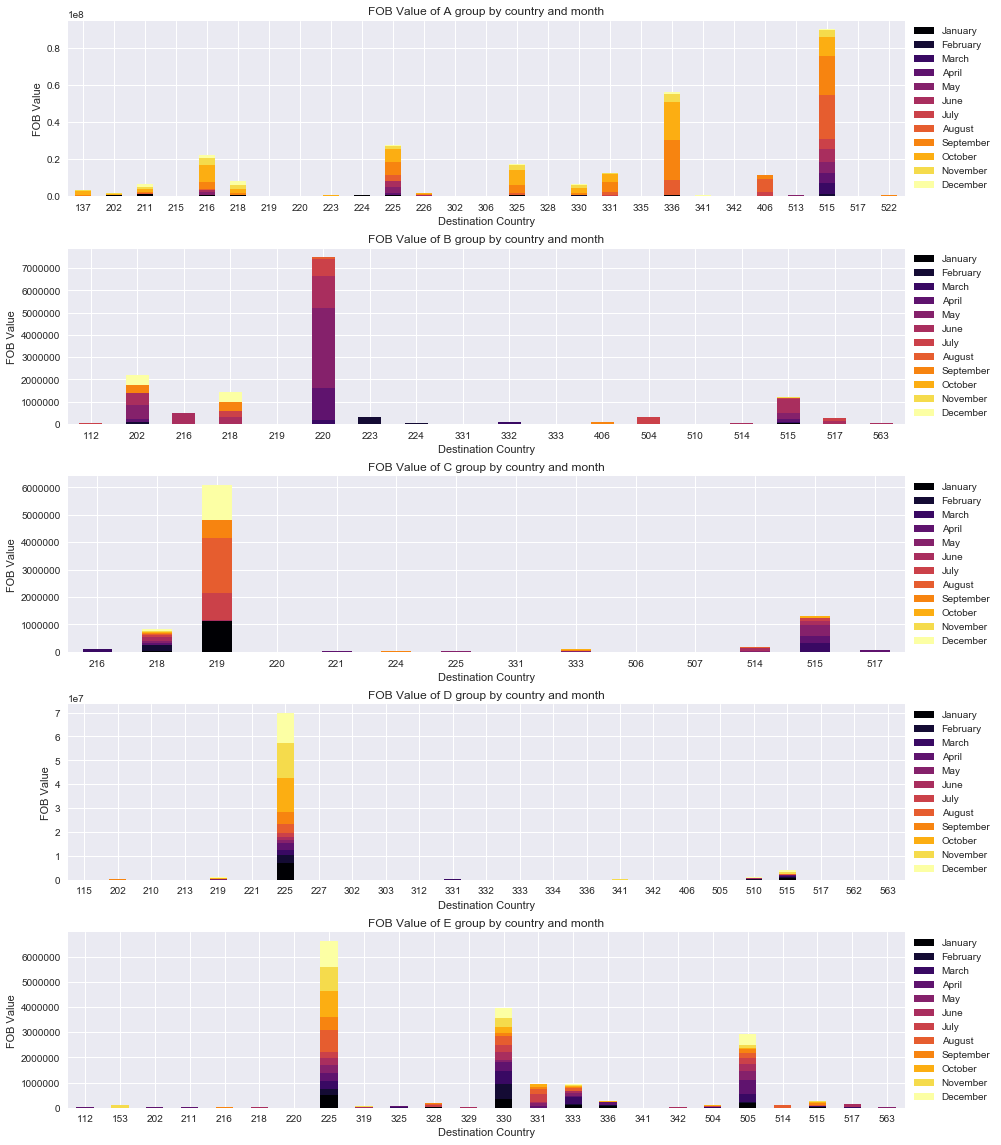

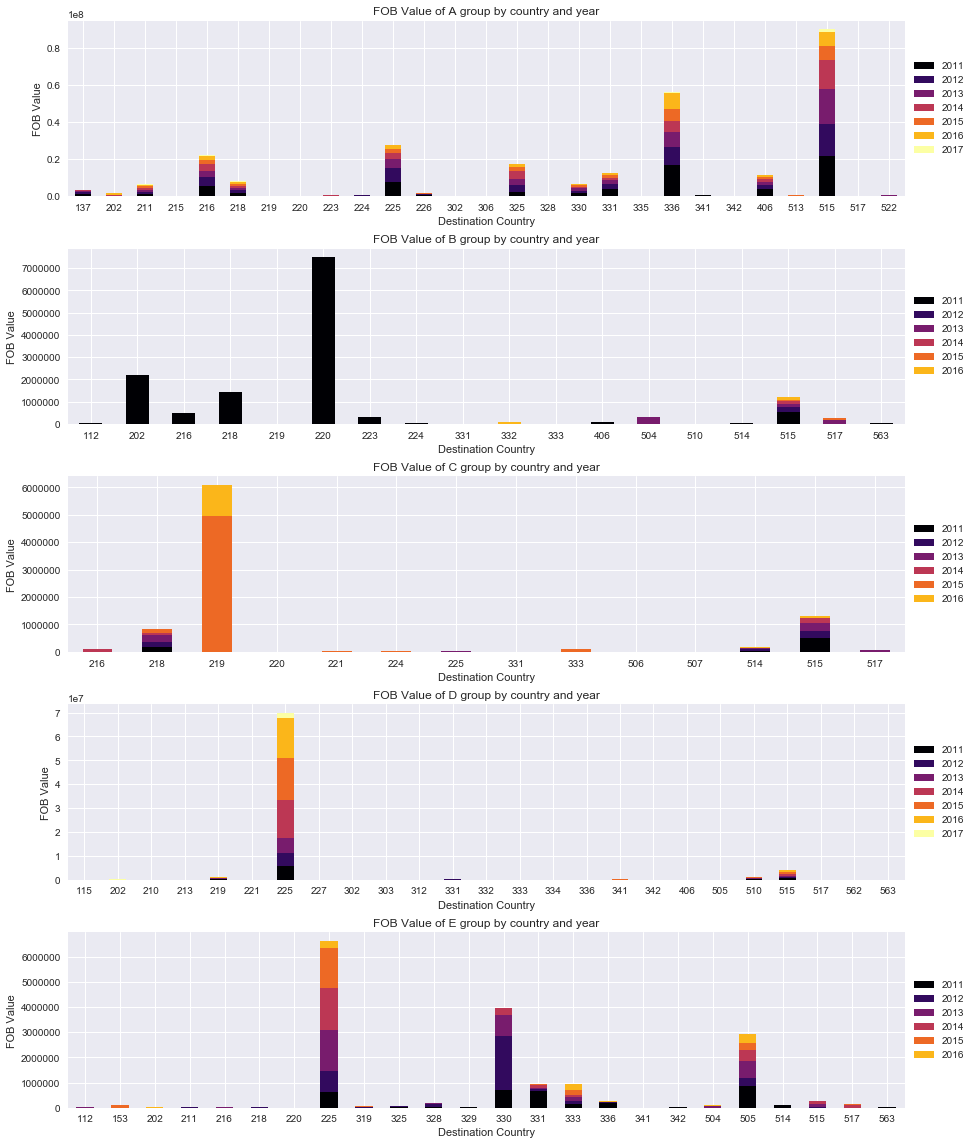

In [32]:
filename = "data" + os.sep + "export" + os.sep + "all_export_with_group.txt"
usecols =  ["MONTH", "TOTALBULTOS", "PESOBRUTOTOTAL", "TOTALVALORFOB", "GROUP", "PAISDESTINO", "YEAR"]

data = pd.read_csv(filename, decimal=',',
                   sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                   usecols = usecols)

colors = plt.cm.inferno(np.linspace(0, 1, 12))

for element,text in [("TOTALBULTOS",  "Number of Packages"),
                     ("PESOBRUTOTOTAL", "Total weight"),
                     ("TOTALVALORFOB", "FOB Value")]:
    
    print("{} {} {}".format("-"*50, text, "-"*50) )
    
    fig, axes_month = plt.subplots(5)
    plt.subplots_adjust(hspace=0.3)
    
    fig, axes_year = plt.subplots(5)
    plt.subplots_adjust(hspace=0.3)
    
    i = 0
    
    tables = []

    for group in ["A", "B", "C", "D", "E"]:
        
        new_data = data[data["GROUP"] == group]
        
        new_data_grouper = new_data[["MONTH", element, "PAISDESTINO"]].groupby(["PAISDESTINO", 'MONTH']).sum()

        
        plot = new_data_grouper.unstack().plot(kind='bar',
                                               ax=axes_month[i],
                                               stacked=True,
                                               figsize=(15, 20),
                                               color=colors_month)

        plot.set_title("{} of {} group by country and month".format(text, group))
        plot.set_xlabel("Destination Country")
        plot.set_ylabel(text)
        
        plot.legend(["January","February","March","April", "May", "June", "July",
                     "August", "September", "October", "November", "December"], 
                    loc='center left', bbox_to_anchor=(1.0, 0.5))
        
        plot.set_xticklabels(plot.get_xticklabels(), rotation="horizontal")
                
        new_data_grouper = new_data[["YEAR", element, "PAISDESTINO"]].groupby(["PAISDESTINO", 'YEAR']).sum()

        
        plot = new_data_grouper.unstack().plot(kind='bar',
                                               ax=axes_year[i],
                                               stacked=True,
                                               figsize=(15, 20),
                                               color=colors_year)

        plot.set_title("{} of {} group by country and year".format(text, group))
        plot.set_xlabel("Destination Country")
        plot.set_ylabel(text)
        
        plot.legend(["2011", "2012", "2013", "2014", "2015", "2016", "2017"],
                    loc='center left', bbox_to_anchor=(1.0, 0.5))
        
        plot.set_xticklabels(plot.get_xticklabels(), rotation="horizontal")

        
        i += 1
        
        tables.append(new_data_grouper.unstack().to_string())
        
    plt.show()
    
    #for table, group in zip(tables, ["A", "B", "C", "D", "E"]):
    #    print("----- {} del grupo {} ------\n\n{}\n".format(text, group, table))